In [8]:
%matplotlib inline
import pandas as pd
import pandas_datareader
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

In [18]:
stockFile = 'data/T10yr.csv'
# index_col=0：默认index为日期值，后面ARIMA模型建模， 求ACF PACF 等都要求以时间为index
# parse_dates=[0]：并把日期格式化
stock = pd.read_csv(stockFile,index_col=0,parse_dates=[0])
# stock.tail()

In [14]:
# 重采样 以每周一  Close:每天的收盘价
stock_week = stock['Close'].resample('W-MoN').mean()
stock_train = stock_week['2000':'2015']

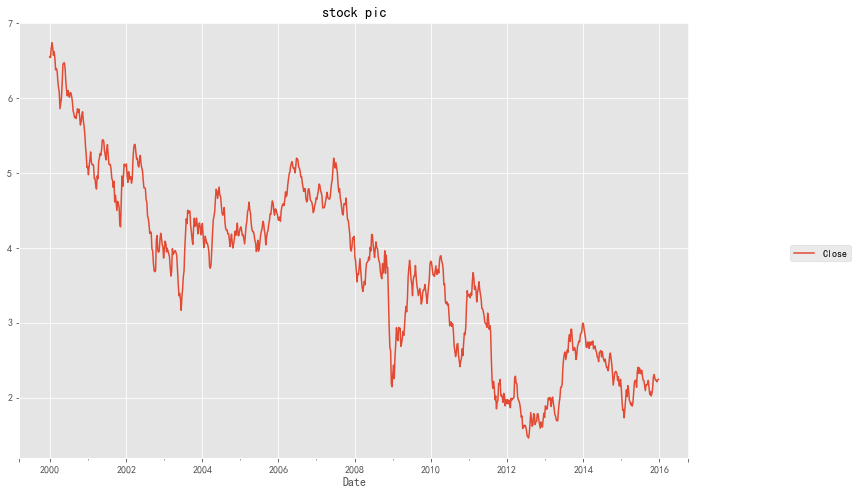

In [17]:
# 先画出股票数据，
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25,0.5))
plt.title('stock pic')
sns.despine()

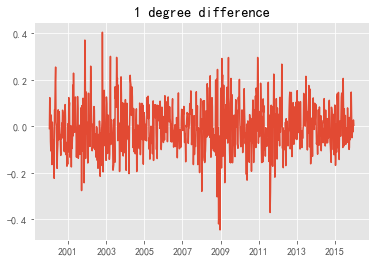

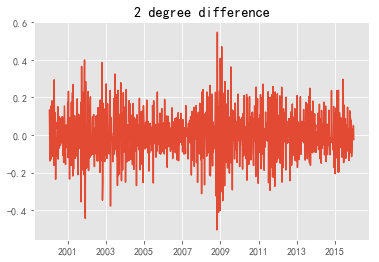

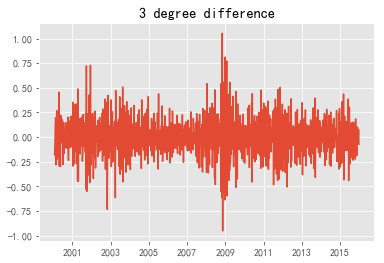

In [24]:
# 浮动较大 不平稳 做差分 做几阶呢？
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()

# 一阶差分
plt.figure()
plt.plot(stock_diff)
plt.title('1 degree difference')
plt.show()

# 二阶差分
stock_diff2 = stock_diff.diff()
stock_diff2 = stock_diff2.dropna()
plt.figure()
plt.plot(stock_diff2)
plt.title('2 degree difference')
plt.show()

stock_diff3 = stock_diff2.diff()
stock_diff3 = stock_diff3.dropna()
plt.figure()
plt.plot(stock_diff3)
plt.title('3 degree difference')
plt.show()


C:\Software\Anaconda2\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Software\Anaconda2\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


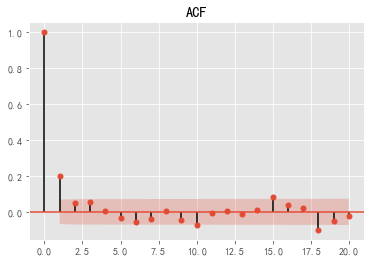

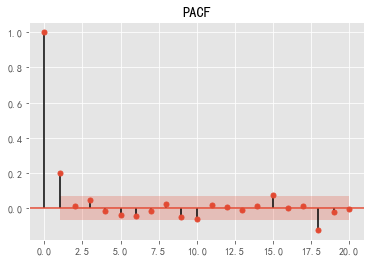

In [26]:
# ACF PACF 
acf = plot_acf(stock_diff,lags=20)
plt.title('ACF')
acf.show()

pacf = plot_pacf(stock_diff,lags=20)
plt.title('PACF')
pacf.show()

In [53]:
# 这里 p,d,q都选1
model = ARIMA(stock_train,order=(1,1,1),freq='W-MON')
# stock_train

In [32]:
result = model.fit()

In [74]:
pred = result.predict(start='2008-06-09',end='2015-12-28',dynamic=True,typ='levels')
# print pred

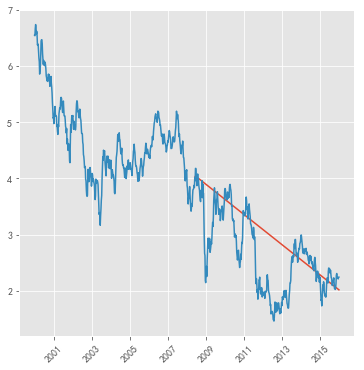

In [75]:
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)



